Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Četvrta laboratorijska vježba: Procjena parametara, probabilistički grafički modeli, grupiranje

*Verzija: 1.0
Zadnji put ažurirano: 1. listopada 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **21. siječnja 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Četvrta laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Učitaj osnovne biblioteke...
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pgmpy as pgm
%pylab inline

def plot_silhouette(n_clusters, X):
    # Kôd preuzet s http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = plt.cm.get_cmap("Dark2")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Vrijednosti koeficijenta siluete")
    ax1.set_ylabel("Oznaka grupe")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = plt.cm.get_cmap("Dark2")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=1,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers # changed to black
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="black", alpha=1, s=100, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=80, edgecolor='k')

    ax2.set_xlabel(r"$x_1$")
    ax2.set_ylabel(r"$x_2$")

    plt.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


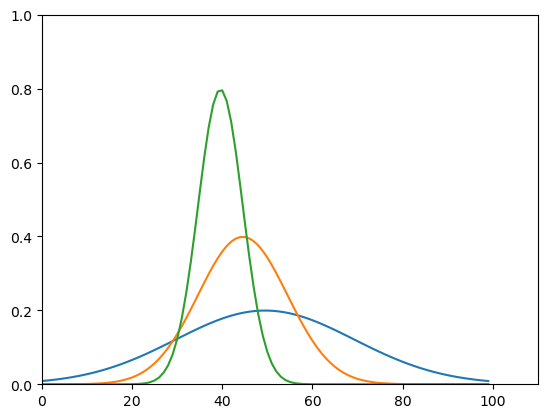

In [25]:
from matplotlib import pyplot as mp

def gaussian(x, mu, sigma):
    return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)

for mu, sigma in [(1, 2), (0.5, 1), (0, 0.5)]: #(mu,sigma)
    mp.plot(gaussian(np.linspace(-4, 6, 100, ), mu, sigma))
    mp.xlim(0,110)  #set x-axes limits
    mp.ylim(0,1)  #set y-axes limits

mp.show()

### 1. Procjena maksimalne izglednosti

#### (a)

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [3]:
def L(mu, N, m):
    opposite_value = 1-mu
    return pow(mu,m)*pow(opposite_value, N-m)

#### (b)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

In [4]:
N1, N2 = 10, 100
m1, m2 = [1,2,5,9], [1,10,50,90]

In [5]:
def show_bernoulli_likelihood(N, m_array,x=np.linspace(0,1,100)):   
    m_array = sorted(m_array)
    if N < m_array[len(m_array) - 1]:
        raise Exception("Invalid m and N parameters")
    
    for m in m_array:
        likelihood_values = []
        for mu in x:
            likelihood_values.append(L(mu=mu, N = N, m=m))
        
        plt.plot(x, likelihood_values, label=f"m = {m}")
        plt.legend(loc="best")
    
    
    plt.xlabel("μ")
    plt.ylabel(f"L(μ|D)")
    plt.title("Bernoulli")
    plt.show()


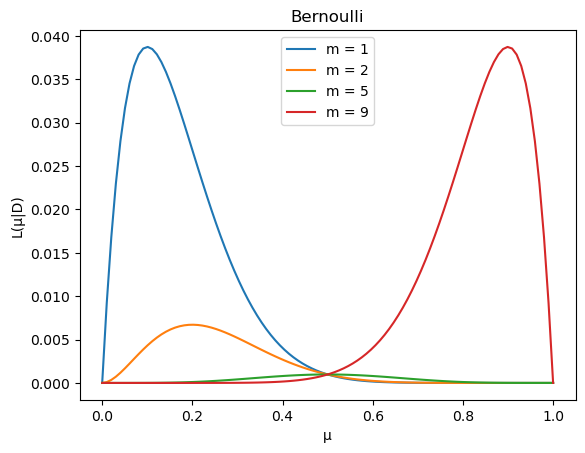

In [6]:
show_bernoulli_likelihood(N=N1,m_array=m1)

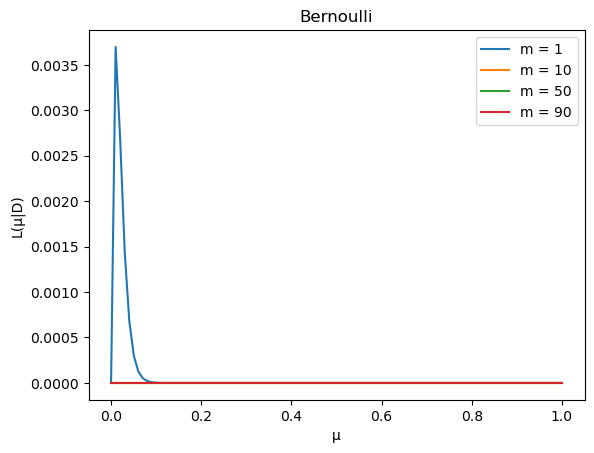

In [7]:
show_bernoulli_likelihood(N=N2,m_array=m2)

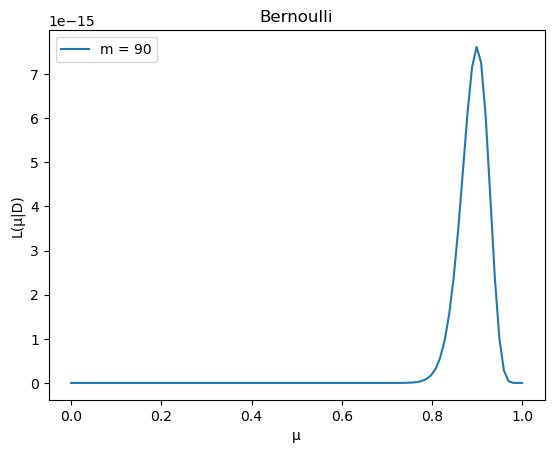

In [8]:
show_bernoulli_likelihood(N=N2, m_array=[90])

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

#### (c)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

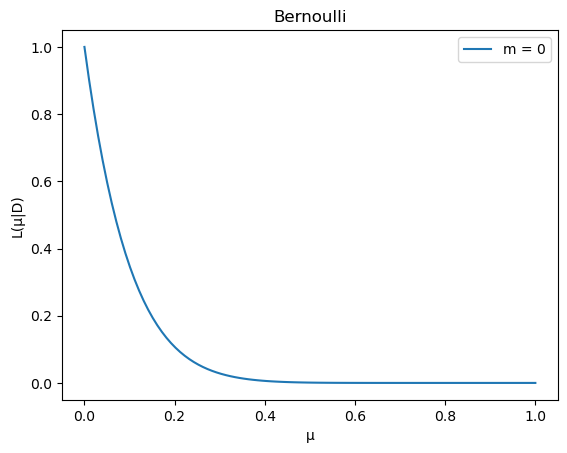

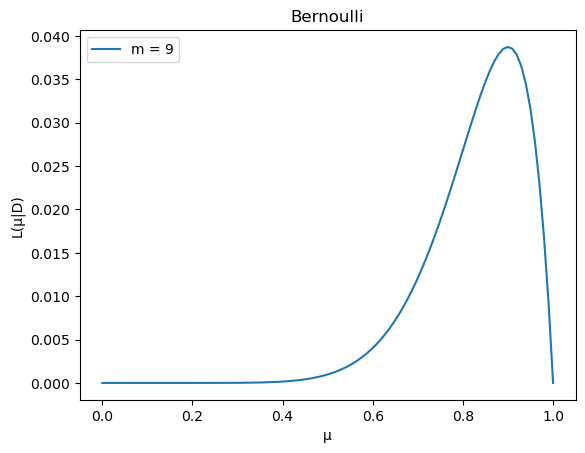

In [9]:
show_bernoulli_likelihood(N=N1,m_array=[0])
show_bernoulli_likelihood(N=N1,m_array=[9])

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

### 2. Procjena maksimalne aposteriorne vjerojatnosti

#### (a)

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

In [10]:
from scipy.stats import beta
def show_beta_distribution(figsize=(8,9),alpha_beta_tuple=None, upper_limit = 2.5):
    if alpha_beta_tuple is None:
        alpha_beta_tuple = [(0.5, 0.5), (1, 1), (2, 2), (4, 2), (2, 4)]
        
    plt.figure(figsize=figsize)
    plt.ylim(0, upper_limit)
    
    for alpha_beta in alpha_beta_tuple:
        alpha = alpha_beta[0]
        beta_p = alpha_beta[1]
        x = np.linspace(0,1)
        y_values = beta.pdf(x,alpha, beta_p)
        plt.plot(x, y_values, label=f"α = {alpha}, β = {beta_p}")
    
    plt.legend(loc="best")
    plt.title("Beta distribution")
    plt.show()

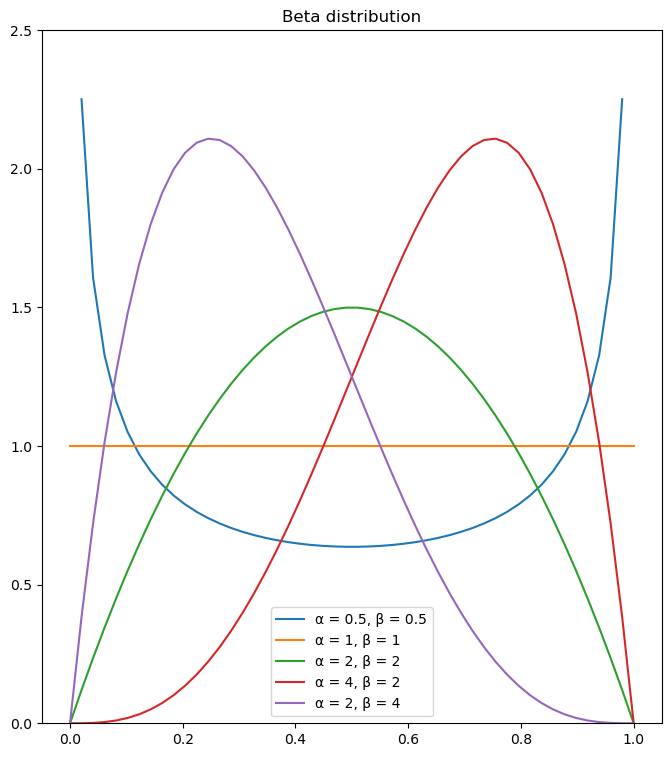

In [11]:
show_beta_distribution()

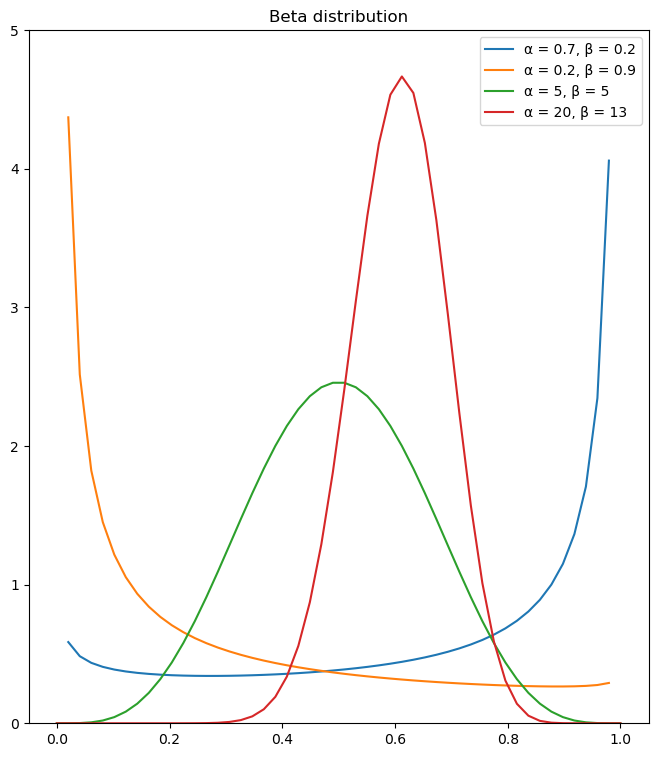

In [31]:
show_beta_distribution(alpha_beta_tuple= [(0.7, 0.2), (0.2, 0.9), (5, 5), (20,13)], upper_limit=5)

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

#### (b)

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za $N=10$ i $m=9$ i nekolicinu kombinacija parametara $\alpha$ i $\beta$. 

In [13]:
def show_beta_bernoulli_distibution(m, N, alpha_beta_tuple = None, x = np.linspace(0.01, 0.99, 100)):
    if alpha_beta_tuple is None:
        alpha_beta_tuple = [(0.5, 0.5), (1, 1), (2, 2), (4, 2), (2, 4)]
    

    for alpha_beta in alpha_beta_tuple:
        results = []
        alpha = alpha_beta[0]
        beta_p = alpha_beta[1]
        for mu in x:
            bernoulli = L(mu=mu, N=N, m=m)
            beta_v = beta.pdf(mu, alpha, beta_p)
            results.append(bernoulli * beta_v)
        
        plt.plot(x, results, label=f"α = {alpha}, β = {beta_p}, m = {m}")
    
    plt.legend(loc="best")
    plt.show()

<Figure size 640x480 with 0 Axes>

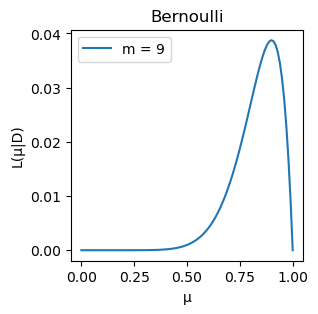

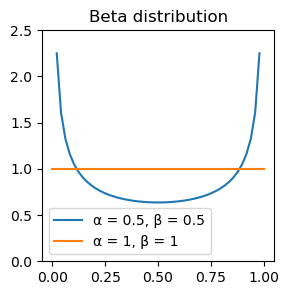

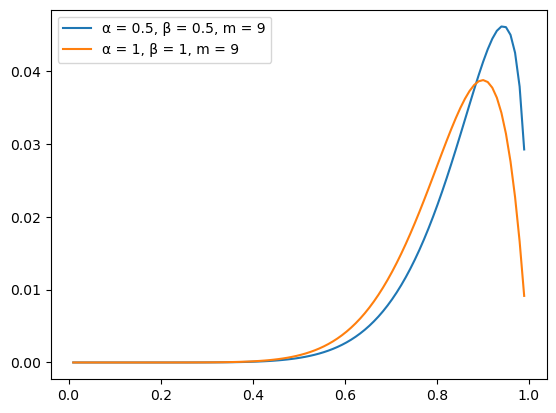

In [14]:
plt.tight_layout()
plt.figure(figsize=(3,3))
show_bernoulli_likelihood(N=10, m_array = [9])
show_beta_distribution(figsize=(3,3),alpha_beta_tuple=[(0.5,0.5), (1,1)])
show_beta_bernoulli_distibution(m=9, N=10, alpha_beta_tuple=[(0.5,0.5),(1,1)])

<Figure size 640x480 with 0 Axes>

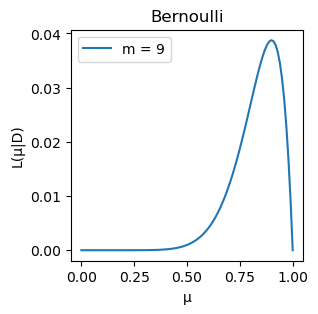

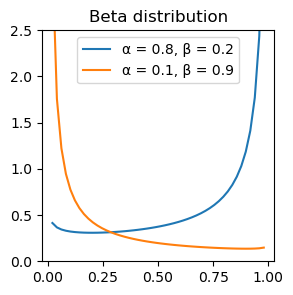

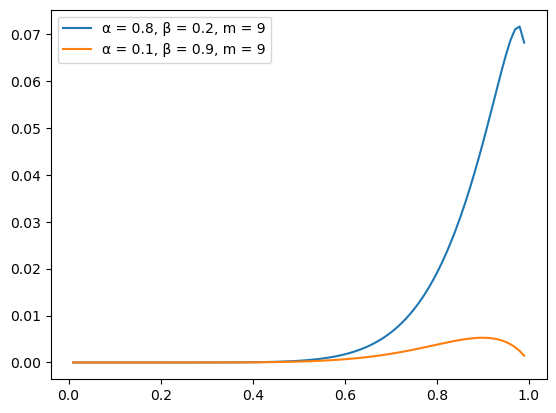

(None,)

In [15]:
plt.tight_layout()
plt.figure(figsize=(3,3))
show_bernoulli_likelihood(N=10, m_array = [9])
show_beta_distribution(figsize=(3,3),alpha_beta_tuple=[(0.8,0.2), (0.1,0.9)])
show_beta_bernoulli_distibution(m=9, N=10, alpha_beta_tuple=[(0.8,0.2), (0.1,0.9)]),

**Q**: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

#### (c)

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

In [16]:
N = 10
m = 1
x = np.linspace(0,1,100)

In [17]:
# P(mu,D) = P(D|mu)*P(mu), prva je bernoulli druga je beta
def graph_all_on_one(x,N,m,alpha,beta_v):
    bernoulli = L(mu=x, N=N, m=m)
    beta_r = beta.pdf(x, alpha, beta_v)
    plt.plot(x, beta_r*bernoulli, label=f"P(μ, D)")
    plt.plot(x, beta_r, label=f"P(μ | α,β)")
    plt.plot(x,bernoulli, label=f"L(μ | D)")
    
    plt.legend(loc = "best")
    plt.show()

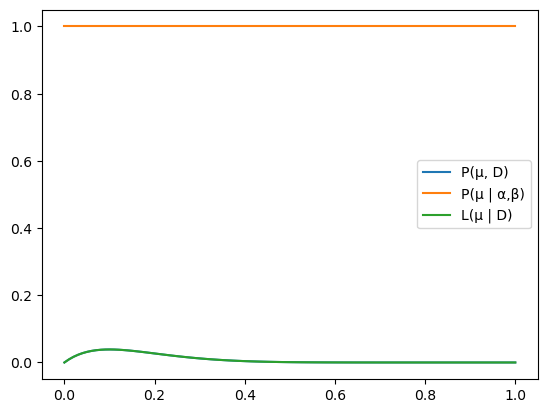

In [18]:
graph_all_on_one(x=x,N=N,m=m,alpha=1,beta_v=1)

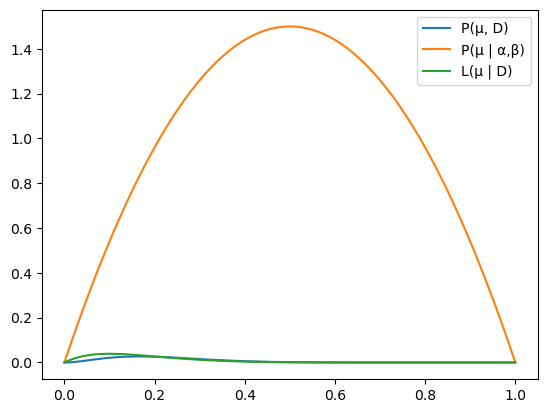

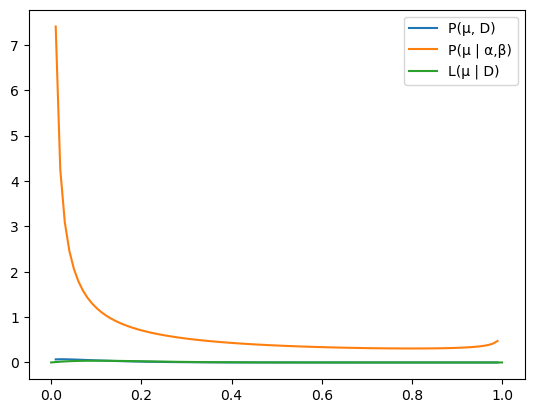

In [19]:

graph_all_on_one(x=x,N=N,m=m,alpha=2,beta_v=2)
graph_all_on_one(x=x,N=N,m=m,alpha=0.2,beta_v=0.8)

### 3. Analiza skupa podataka *Iris*

#### (a)

Učitajte skup podataka *Iris* korištenjem funkcije [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (**u nastavku radite isključivo s primjerima iz te jedne klase**). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

**NB:** Mogla bi Vam dobro dući funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

In [304]:
from sklearn.datasets import load_iris
import itertools as it
chosen_class = 2

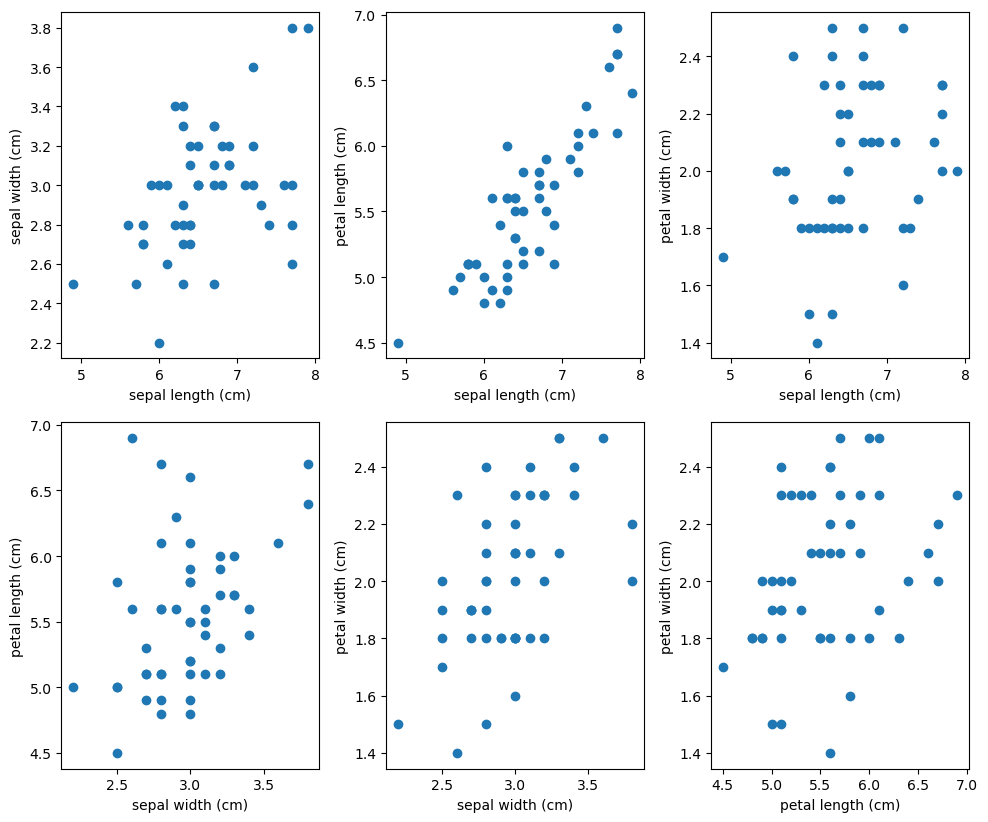

In [308]:
plt.figure(figsize=(10, 12))
dataset = load_iris()
data = dataset.data[np.where(dataset.target == chosen_class)]
features_index_comb = list(it.combinations(range(0, len(dataset.feature_names)), 2))
plot_number = 1
for comb in features_index_comb:
    x_index = comb[0]
    y_index = comb[1]
    x = data[:, x_index]
    y = data[:, y_index]
    plt.subplot(3, 3, plot_number)
    plt.tight_layout()
    plt.xlabel(dataset.feature_names[comb[0]])
    plt.ylabel(dataset.feature_names[comb[1]])
    plt.scatter(x, y)
    plot_number += 1

#### (b)

Pogledajte opis modula [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

In [320]:
from scipy.stats import norm

def L_gauss(x, mi, sigma):
    ##N = len(x)
    ##return -N/2*np.log(2*np.pi) - N * np.log(sigma) - sum(pow(x - mi, 2))/(2*pow(sigma,2))
    ##return np.log(np.prod(norm.pdf(x, mi, sigma)))
    return np.sum(np.log(norm.pdf(x, mi, sigma)))

#### (c)
Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

In [310]:
def mle_mi(x):
    return sum(x) / len(x)


def mle_sigma(x, mi):
    return sum(pow(x - mi, 2)) / len(x)

In [321]:
for index in range(0, len(dataset.feature_names)):
    x = data[:, index]
    mi = mle_mi(x)
    sigma = pow(mle_sigma(x, mi), 0.5)
    print(f"Log izglednost značajke {dataset.feature_names[index]} = {L_gauss(x, mi, sigma)}")

Log izglednost značajke sepal length (cm) = -47.80455636149741
Log izglednost značajke sepal width (cm) = -13.858730623718918
Log izglednost značajke petal length (cm) = -40.72195799587678
Log izglednost značajke petal width (cm) = -5.8289831462679444


#### (d)

Proučite funkciju [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [312]:
from scipy.stats import pearsonr

for comb in features_index_comb:
    x_index = comb[0]
    y_index = comb[1]
    x = data[:, x_index]
    y = data[:, y_index]
    r = pearsonr(x, y)
    print(
        f"Correlation between features {dataset.feature_names[x_index]} and {dataset.feature_names[y_index]} -> {r.statistic}")

Correlation between features sepal length (cm) and sepal width (cm) -> 0.45722781639411314
Correlation between features sepal length (cm) and petal length (cm) -> 0.8642247329355763
Correlation between features sepal length (cm) and petal width (cm) -> 0.28110770915731936
Correlation between features sepal width (cm) and petal length (cm) -> 0.40104457734278554
Correlation between features sepal width (cm) and petal width (cm) -> 0.5377280262661888
Correlation between features petal length (cm) and petal width (cm) -> 0.32210821590031835


#### (e)

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika (srednja apsolutna i kvadratna) smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [313]:
N = len(data)
N_lista = [int(N / 4), int(N / 2), N]

past_average = None
past_quadratic = None

for n in N_lista:
    rand_index = np.random.choice(a=N, size=int(n), replace=False)
    selected_data = data[rand_index]
    with_bias = np.cov(m=selected_data, rowvar=False, bias=True)
    without_bias = np.cov(m=selected_data, rowvar=False, bias=False)

    average_absolute_diff = sum(abs(with_bias - without_bias)) / n
    quadratic_difference = sum(pow(with_bias - without_bias, 2))
    print(f"Number of examples -> n = {n}")
    print(f"Average mean difference -> {average_absolute_diff}")
    print(f"Quadratic difference -> {quadratic_difference}")
    if past_average is not None:
        print(f"Average difference felt down by -> {int((1 - average_absolute_diff / past_average) * 100)}%")
        print(f"Quadratic difference felt down by -> {int((1 - quadratic_difference / past_quadratic) * 100)}%")

    past_average = average_absolute_diff
    past_quadratic = quadratic_difference
    print()
    print("==================================================")


Number of examples -> n = 12
Average mean difference -> 0.02338173400673403
Quadratic difference -> 0.009864698276961556

Number of examples -> n = 25
Average mean difference -> 0.004149333333333327
Quadratic difference -> 0.0012131752017777743
Average difference felt down by -> 82%
Quadratic difference felt down by -> 87%

Number of examples -> n = 50
Average mean difference -> 0.0008465306122448927
Quadratic difference -> 0.00019945656576426238
Average difference felt down by -> 79%
Quadratic difference felt down by -> 83%



### 4. Probabilistički grafički modeli -- Bayesove mreže

Ovaj zadatak bavit će se Bayesovim mrežama, jednim od poznatijih probabilističkih grafičkih modela (*probabilistic graphical models*; PGM). Za lakše eksperimentiranje koristit ćemo programski paket [`pgmpy`](https://github.com/pgmpy/pgmpy). Molimo Vas da provjerite imate li ovaj paket te da ga instalirate ako ga nemate. Upute se nalaze na gornjoj poveznici. Za korisnike Anaconde, najlakše je upisati `conda install -c ankurankan pgmpy` (ili `pip install pgmpy` ako ne prolazi) unutar Anaconda Prompta (i ponovno pokrenuti Jupyter).

Prvo ćemo pogledati udžbenički primjer s prskalicom. U ovom primjeru razmatramo Bayesovu mrežu koja modelira zavisnosti između oblačnosti (slučajna varijabla $C$), kiše ($R$), prskalice ($S$) i mokre trave ($W$). U ovom primjeru također pretpostavljamo da već imamo parametre vjerojatnosnih distribucija svih čvorova. Ova mreža prikazana je na sljedećoj slici:

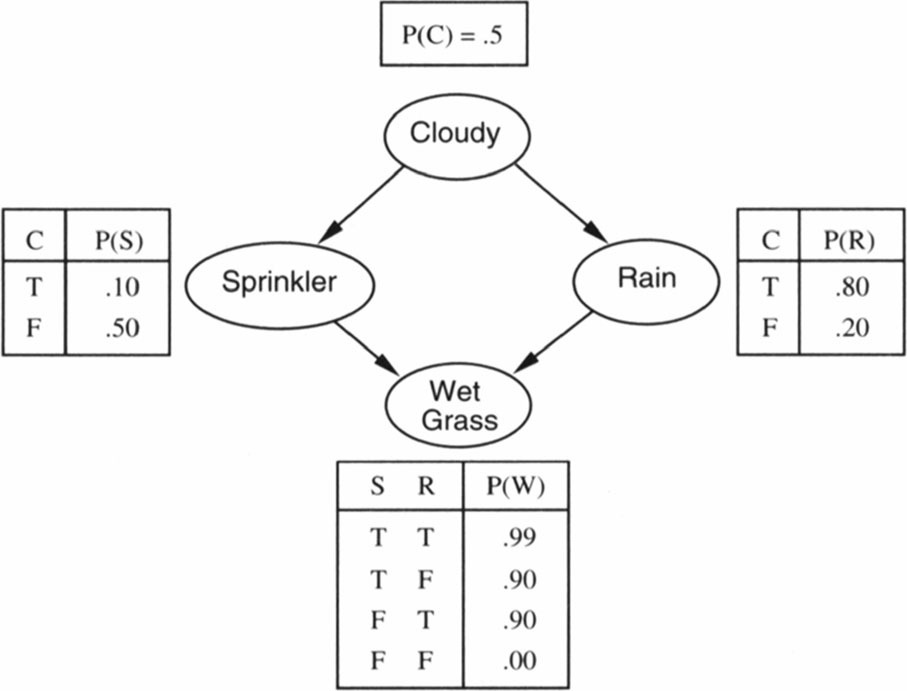

In [132]:
from IPython.display import Image

Image("http://www.fer.unizg.hr/_download/repository/bayes-net-sprinkler.jpg")


Koristeći paket `pgmpy`, konstruirajte Bayesovu mrežu iz gornjeg primjera. Zatim, koristeći **egzaktno** zaključivanje, postavite sljedeće posteriorne upite: $P(w=1)$, $P(s=1|w=1)$, $P(r=1|w=1)$, $P(c=1|s=1, r=1)$ i $P(c=1)$. Provedite zaključivanje na papiru i uvjerite se da ste ispravno konstruirali mrežu. Pomoći će vam službena dokumentacija te primjeri korištenja (npr. [ovaj](https://github.com/pgmpy/pgmpy/blob/dev/examples/Monty%20Hall%20Problem.ipynb)).

In [144]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination

In [162]:
# ('Parent','Child')
model = BayesianNetwork([('C', 'S'), ('C', 'R'), ('S', 'WG'), ('R', 'WG')])

cpd_C = TabularCPD("C", 2, [[0.5], [0.5]])
cpd_S =TabularCPD("S", 2, [
    [0.5, 0.9], # S = 0
    [0.5, 0.1] # S = 1
],
evidence=['C'],
evidence_card=[2])

cpd_R =TabularCPD('R', 2, [
    [0.8, 0.2], # R = 0
    [0.2, 0.8], # R = 1
],
evidence=['C'],
evidence_card=[2])

cpd_WG = TabularCPD('WG', 2, [
    [1, 0.1,0.1, 0.01], # R = 0
    [0,0.9,0.9,0.99]  # R = 1
],
evidence=['S', 'R'],
evidence_card=[2,2]
)

model.add_cpds(cpd_C, cpd_S, cpd_R, cpd_WG)

if not model.check_model():
    raise Exception("Invalid data!")
else:
    print("Everything is ok!")
print(model.get_cpds())
infer = VariableElimination(model)

Everything is ok!
[<TabularCPD representing P(C:2) at 0x2588878c250>, <TabularCPD representing P(S:2 | C:2) at 0x2588878caf0>, <TabularCPD representing P(R:2 | C:2) at 0x2588878c460>, <TabularCPD representing P(WG:2 | S:2, R:2) at 0x2588878c580>]


In [163]:
posterior_wg = infer.query(['WG'])
print("P(w=1)")
print(posterior_wg)

P(w=1)
+-------+-----------+
| WG    |   phi(WG) |
+=======+===========+
| WG(0) |    0.3529 |
+-------+-----------+
| WG(1) |    0.6471 |
+-------+-----------+


In [164]:
posterior_s = infer.query(['S'], evidence={'WG': 1})
print("P(s=1 | w=1)")
print(posterior_s)

P(s=1 | w=1)
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5702 |
+------+----------+
| S(1) |   0.4298 |
+------+----------+


In [165]:
posterior_r = infer.query(['R'], evidence={'WG': 1})
print("P(r=1 | w=1)")
print(posterior_r)

P(r=1 | w=1)
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.2921 |
+------+----------+
| R(1) |   0.7079 |
+------+----------+


In [166]:
posterior_c = infer.query(['C'], evidence={'S': 1, 'R': 1})
print("P(c=1 | s=1, r=1)")
print(posterior_c)

P(c=1 | s=1, r=1)
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5556 |
+------+----------+
| C(1) |   0.4444 |
+------+----------+


In [167]:
p_c = infer.query(['C'])
print("P(c=1)")
print(p_c)

P(c=1)
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+


**Q:** Koju zajedničku vjerojatnosnu razdiobu ova mreža modelira? Kako tu informaciju očitati iz mreže?  
**Q:** U zadatku koristimo egzaktno zaključivanje. Kako ono radi?  
**Q:** Koja je razlika između posteriornog upita i MAP-upita?  
**Q:** Zašto je vjerojatnost $P(c=1)$ drugačija od $P(c=1|s=1,r=1)$ ako znamo da čvorovi $S$ i $R$ nisu roditelji čvora $C$?

### 5. Efekt objašnjavanja

 **Efekt objašnjavanja** (engl. *explaining away*) zanimljiv je fenomen u kojem se događa da se dvije varijable "natječu" za objašnjavanje treće. Ovaj fenomen može se primijetiti na gornjoj mreži. U tom se slučaju varijable prskalice ($S$) i kiše ($R$) "natječu" za objašnjavanje mokre trave ($W$). Vaš zadatak je pokazati da se fenomen zaista događa.

In [173]:
# P (S = 1 | WG = 1) >= P (S = 1 | WG = 1, R = 1)
# P (R = 1 | WG = 1) >= P (R = 1 | WG = 1, S = 1)
posterior_s_wg = infer.query(['S'], evidence={'WG': 1})
posterior_s_wg_r = infer.query(['S'], evidence={'WG': 1, "R": 1})
posterior_r_wg = infer.query(['R'], evidence={'WG': 1})
posterior_r_wg_s = infer.query(['R'], evidence={'WG': 1, "S": 1})

print(f"P(S = 1 | WG = 1) >= P(S = 1 | WG = 1, R = 1) = {posterior_s_wg.values[1]} >= {posterior_s_wg_r.values[1]}")
print(f"P(R = 1 | WG = 1) >= P(R = 1 | WG = 1, S = 1) = {posterior_r_wg.values[1]} >= {posterior_r_wg_s.values[1]}")

P(S = 1 | WG = 1) >= P(S = 1 | WG = 1, R = 1) = 0.4297635605006954 >= 0.1944990176817289
P(R = 1 | WG = 1) >= P(R = 1 | WG = 1, S = 1) = 0.7079276773296245 >= 0.32038834951456313


**Q:** Kako biste svojim riječima opisali ovaj fenomen, koristeći se ovim primjerom?

### 6. Algoritam k-sredina

U ovom zadatku ćete se upoznati s algoritmom k-sredina (engl. *k-means*), njegovim glavnim nedostatcima te pretpostavkama.

#### (a)  
Jedan od nedostataka algoritma k-sredina jest taj što unaprijed zahtjeva broj grupa ($K$) u koje će grupirati podatke. Ta informacija nam često nije dostupna (kao što nam nisu dostupne ni oznake primjera) te je stoga potrebno nekako izabrati najbolju vrijednost hiperparametra $K$. Jedan od naivnijih pristupa jest **metoda lakta/koljena** (engl. *elbow method*) koju ćete isprobati u ovom zadatku.

U svojim rješenjima koristite ugrađenu implementaciju algoritma k-sredina, dostupnoj u razredu [`cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

**NB**: Kriterijska funkcija algoritma k-sredina još se i naziva **inercijom** (engl. *inertia*). Za naučeni model, vrijednost kriterijske funkcije $J$ dostupna je kroz razredni atribut `inertia_`.

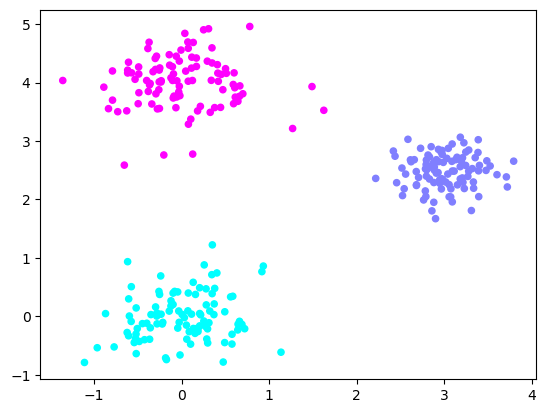

In [22]:
from sklearn.datasets import make_blobs

Xp, yp = make_blobs(n_samples=300, n_features=2, centers=[[0, 0], [3, 2.5], [0, 4]], 
                    cluster_std=[0.45, 0.3, 0.45], random_state=96)
plt.scatter(Xp[:,0], Xp[:,1], c=yp, cmap=plt.get_cmap("cool"), s=20)

Iskoristite skup podataka `Xp` dan gore. Isprobajte vrijednosti hiperparametra $K$ iz $[0,1,\ldots,15]$. Ne trebate dirati nikakve hiperparametre modela osim $K$. Iscrtajte krivulju od $J$ u ovisnosti o broju grupa $K$. Metodom lakta/koljena odredite vrijednost hiperparametra $K$.

In [23]:
min = 1
max = 15
K = range(min,max + 1)

In [24]:
def calculateError(centroids, labels, X):
    J = 0
    k = 0
    for mi_k in centroids:
        for i in range(len(X)):
            if labels[i] == k:
                J += pow(np.linalg.norm(mi_k - X[i], ord=2),2)
        k += 1

    return J

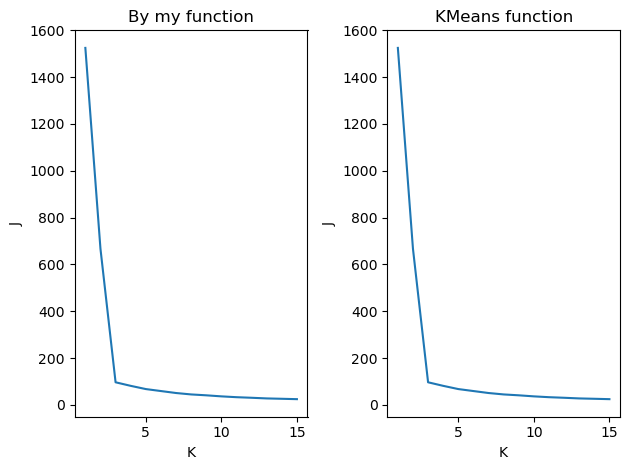

In [25]:
from sklearn.cluster import KMeans

errors = []
errors_kmeans = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xp)
    errors.append(calculateError(kmeans.cluster_centers_, kmeans.labels_,Xp))
    errors_kmeans.append(kmeans.inertia_)
    

plt.subplot(1, 2, 1)
plt.plot(K, errors)
plt.title("By my function")
plt.xlabel("K")
plt.ylabel("J")

plt.subplot(1, 2, 2)
plt.plot(K, errors_kmeans)
plt.title("KMeans function")
plt.xlabel("K")
plt.ylabel("J")

plt.tight_layout()
plt.show()
    

In [26]:
kmeans = KMeans(n_clusters=300)
kmeans.fit(Xp)
print(f"J = {kmeans.inertia_} za K = N = 300")

J = 0.0 za K = N = 300


**Q:** Koju biste vrijednost hiperparametra $K$ izabrali na temelju ovog grafa? Zašto? Je li taj odabir optimalan? Kako to znate?    
**Q:** Je li ova metoda robusna?  
**Q:** Možemo li izabrati onaj $K$ koji minimizira pogrešku $J$? Objasnite.

#### (b)  
Odabir vrijednosti hiperparametra $K$ može se obaviti na mnoštvo načina. Pored metode lakta/koljena, moguće je isto ostvariti i analizom siluete (engl. *silhouette analysis*). Za to smo pripremili funkciju `plot_silhouette` koja za dani broj grupa i podatke iscrtava prosječnu vrijednost koeficijenta siluete i vrijednost koeficijenta svakog primjera (kroz grupe). 

Vaš je zadatak isprobati različite vrijednosti hiperparametra $K$, $K \in \{2, 3, 5\}$ i na temelju dobivenih grafova odlučiti se za optimalan $K$.

In [27]:
K = [2,3,5]

For n_clusters = 2 The average silhouette_score is : 0.59280796169837


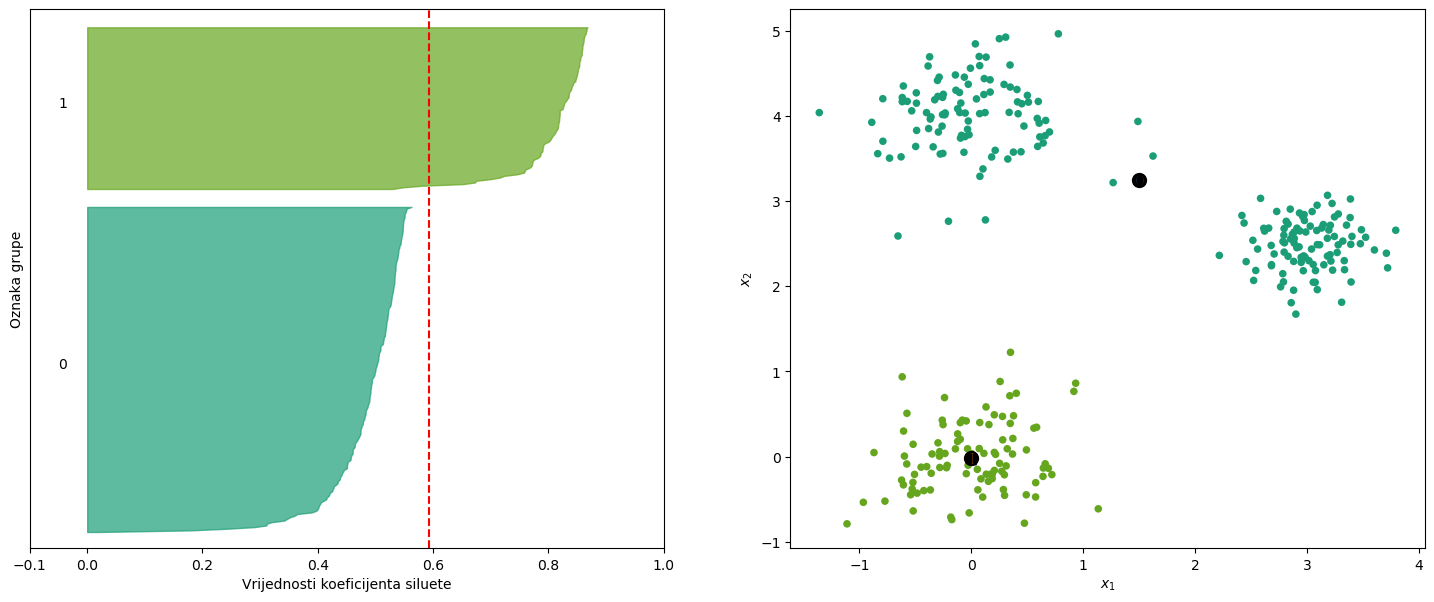

For n_clusters = 3 The average silhouette_score is : 0.7975462212061406


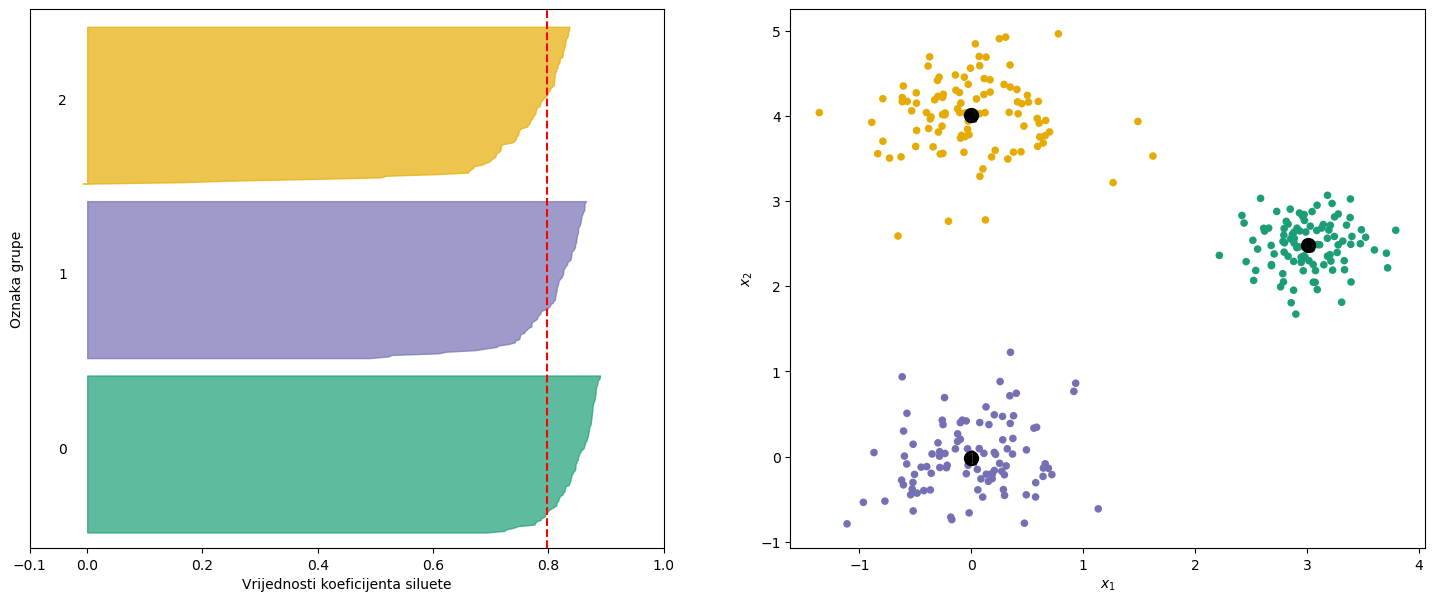

For n_clusters = 5 The average silhouette_score is : 0.5059026123508755


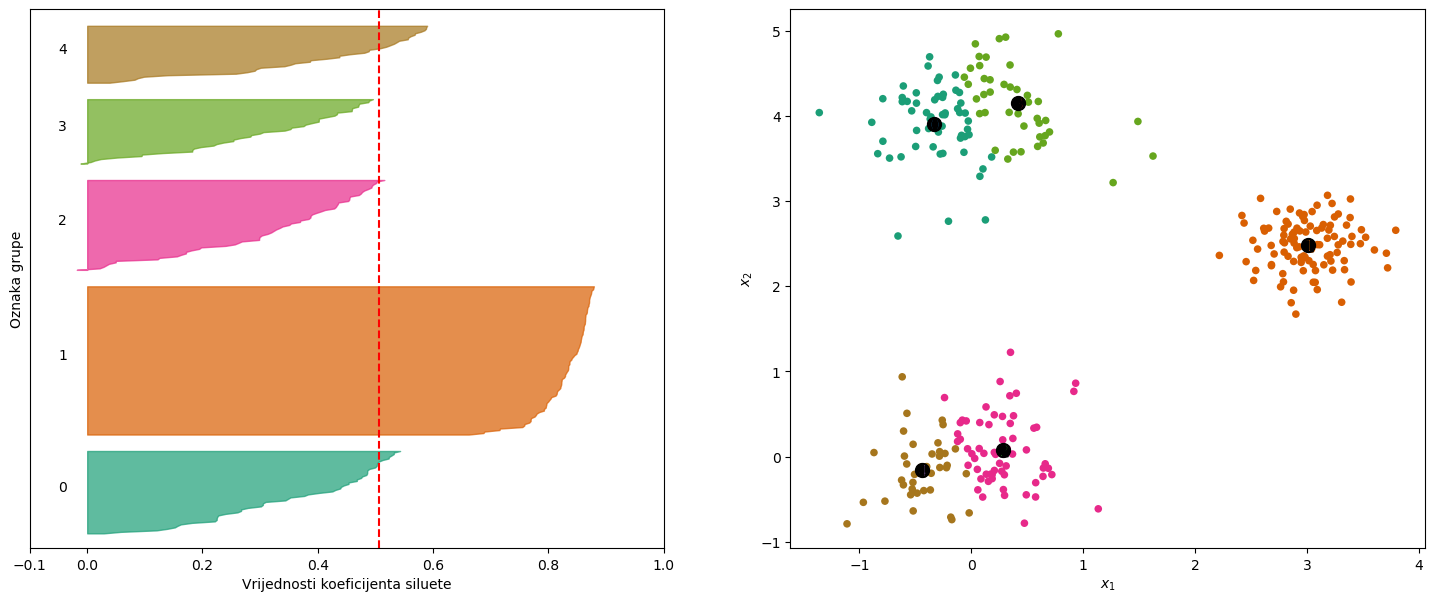

In [28]:
for k in K:
    plot_silhouette(n_clusters=k, X=Xp)

**Q:** Kako biste se gledajući ove slike odlučili za $K$?  
**Q:** Koji su problemi ovog pristupa?

#### (c)  
U ovom i sljedećim podzadatcima fokusirat ćemo se na temeljne pretpostavke algoritma k-sredina te što se događa ako te pretpostavke nisu zadovoljene. 

Prvo, krenite od podataka `X1`, koji su generirani korištenjem funkcije [`datasets.make_blobs`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), koja stvara grupe podataka pomoću izotropskih Gaussovih distribucija.

In [1]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0], [1.3, 1.3]], cluster_std=[0.15, 0.5], random_state=96)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.get_cmap("cool"), s=20)

NameError: name 'plt' is not defined

Naučite model k-sredina (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

In [30]:
def train_and_plot_kmeans(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    y = kmeans.labels_
    plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.get_cmap("cool"), s=20)

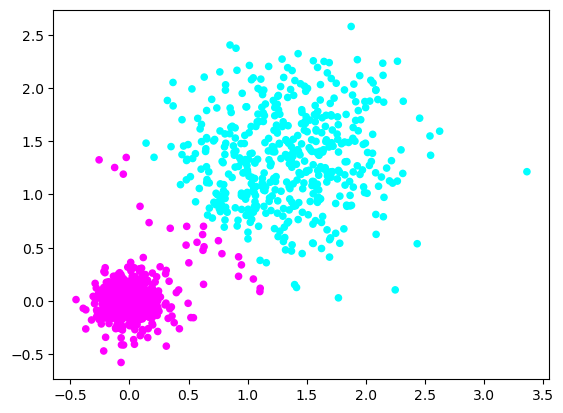

In [31]:
train_and_plot_kmeans(X=X1)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (d)

Isprobajte algoritam k-sredina na podatcima generiranim korištenjem funkcije [`datasets.make_circles`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), koja stvara dvije grupe podataka tako da je jedna unutar druge.

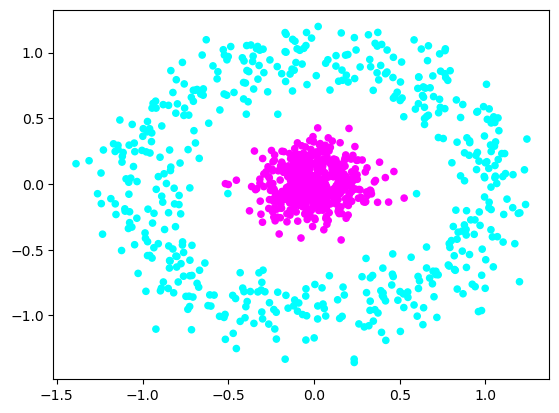

In [32]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(n_samples=1000, noise=0.15, factor=0.05, random_state=96)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.get_cmap("cool"), s=20)

Ponovno, naučite model k-sredina (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

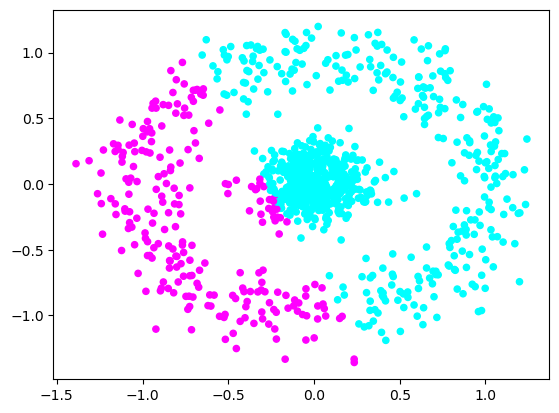

In [33]:
train_and_plot_kmeans(X=X2)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (e)  
Završno, isprobat ćemo algoritam na sljedećem umjetno stvorenom skupu podataka:

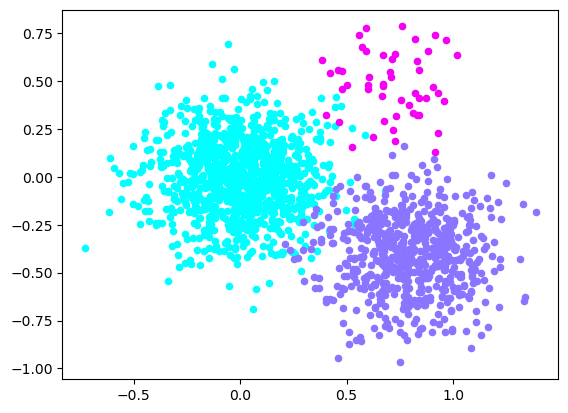

In [34]:
X31, y31 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0]], cluster_std=[0.2], random_state=69)
X32, y32 = make_blobs(n_samples=50, n_features=2, centers=[[0.7, 0.5]], cluster_std=[0.15], random_state=69)
X33, y33 = make_blobs(n_samples=600, n_features=2, centers=[[0.8, -0.4]], cluster_std=[0.2], random_state=69)
plt.scatter(X31[:,0], X31[:,1], c="#00FFFF", s=20)
plt.scatter(X32[:,0], X32[:,1], c="#F400F4", s=20)
plt.scatter(X33[:,0], X33[:,1], c="#8975FF", s=20)

# Just join all the groups in a single X.
X3 = np.vstack([X31, X32, X33])
y3 = np.hstack([y31, y32, y33])

Ponovno, naučite model k-sredina (ovaj put idealno pretpostavljajući $K=3$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

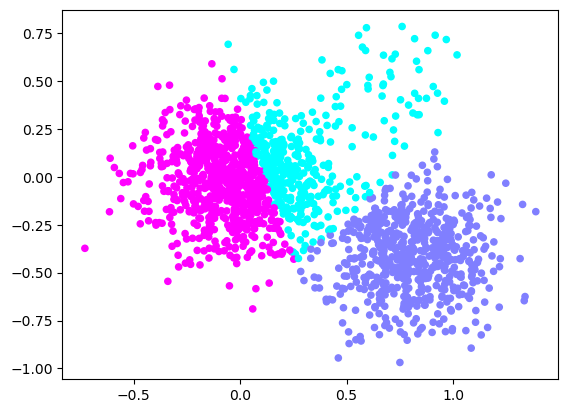

In [35]:
train_and_plot_kmeans(X=X3,n_clusters=3)

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-sredina ovdje narušena?  
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

### 7. Model Gaussovih mješavina

Sada kada ste se upoznali s ograničenjima algoritma k-sredina, isprobat ćete grupiranje modelom mješavine Gaussa (*Gaussian Mixture Models; GMM*), koji je generalizacija algoritma k-sredina (odnosno, algoritam k-sredina specijalizacija je GMM-a). Implementacija ovog modela dostupna je u [`mixture.GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html). Isprobajte ovaj model (s istim pretpostavkama o broju grupa) na podacima iz podzadataka (c)-(e). Ne morate mijenjati nikakve hiperparametre ni postavke osim broja komponenti.

In [36]:
from sklearn.mixture import GaussianMixture

In [37]:
def train_and_plot_GMM(X, n_components=2):
    GMM = GaussianMixture(n_components=n_components)
    GMM.fit(X)
    y = GMM.predict(X)
    plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.get_cmap("cool"), s=20)

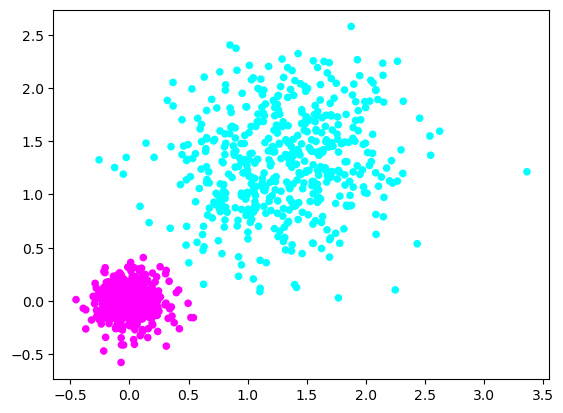

In [38]:
# c
train_and_plot_GMM(X1)

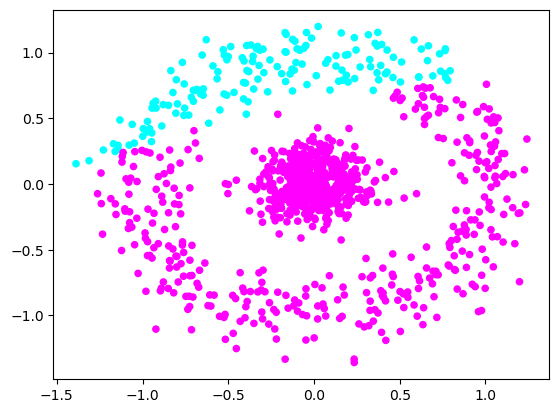

In [39]:
# d
train_and_plot_GMM(X2)

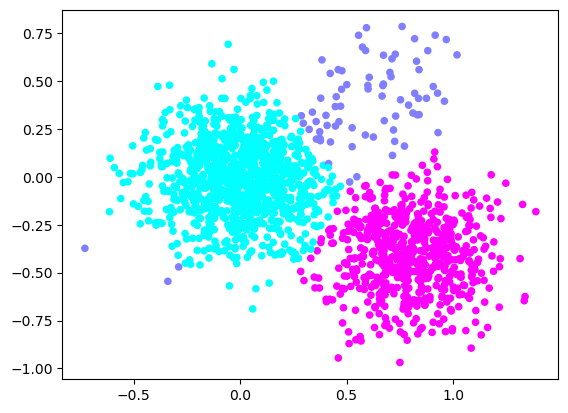

In [40]:
# e
train_and_plot_GMM(X3, n_components=3)

### 8. Vrednovanje grupiranja

Kako vrednovati točnost modela grupiranja ako imamo stvarne oznake svih primjera (a u našem slučaju imamo, jer smo mi ti koji smo generirali podatke)? Često korištena mjera jest **Randov indeks** koji je zapravo pandan točnosti u zadatcima klasifikacije. Implementirajte funkciju `rand_index_score(y_gold, y_predict)` koja ga računa. Funkcija prima dva argumenta: listu stvarnih grupa kojima primjeri pripadaju (`y_gold`) i listu predviđenih grupa (`y_predict`). Dobro će vam doći funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

In [2]:
from sklearn.metrics import rand_score 

In [3]:
import itertools as it


def rand_index_score(y_gold, y_predict):
    y_predict_comb_index = list(it.combinations(range(len(y_predict)), 2))
    denominator = len(y_predict_comb_index)
    a, b = 0, 0
    
    for comb in y_predict_comb_index:
        first_index = comb[0]
        second_index = comb[1]
        y_first_predicted = y_predict[first_index] 
        y_second_predicted = y_predict[second_index] 
        y_first_true = y_gold[first_index] 
        y_second_true = y_gold[second_index] 

        if y_first_true == y_second_true:
            if y_first_predicted == y_second_predicted:
                a += 1
        elif y_first_true != y_second_true:
            if y_first_predicted != y_second_predicted:
                b += 1
        
    return (a+b)/denominator

In [43]:
def calculate_rand_index(X, y_gold ,n_clusters = 2):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    y_predict = kmeans.labels_
    print(f'My function result -> {rand_index_score(<, kemk )}')
    print(f'Implemented function result -> {rand_score(y_gold,y_predict)}')

In [44]:
rand_index_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [45]:
calculate_rand_index(X1,y1)

My function result -> 0.9531051051051052
Implemented function result -> 0.9531051051051052


In [46]:
calculate_rand_index(X2,y2)

My function result -> 0.5615135135135135
Implemented function result -> 0.5615135135135135


In [47]:
calculate_rand_index(X3,y3,3)

My function result -> 0.353164636051234
Implemented function result -> 0.353164636051234


**Q:** Zašto je Randov indeks pandan točnosti u klasifikacijskim problemima?  
**Q:** Koji su glavni problemi ove metrike?   
**Q:** Kako vrednovati kvalitetu grupiranja ako nenamo stvarne oznake primjera? Je li to uopće moguće?